# Module 13: GUIs Return, Visualization, and Database Connection

## Topic 1a: GUIs

In [3]:
import random
import tkinter
from tkinter import *

def get_random_number():
    button.config(text=str(random.randint(0,1000000)))
    button.config(state='disabled')

def make_button_active():
    button.config(state='active')

m = tkinter.Tk()
m.title('get a random number!')
button = tkinter.Button(m,text="click for number",width = 30,state='active',command = get_random_number)
button.grid(row=1)
button2 = tkinter.Button(m,text="click to reactivate",width = 30,command = make_button_active)
button2.grid(row=2)
exit_button = tkinter.Button(m, text='Exit', width=16, command=m.destroy)
exit_button.grid(row=3)
m.mainloop()  # infinite loop that waits for events to happen

## Topic 1b: Data Visualization

### Data visualization is very powerful because it allows us to abstract away complexity for decision makers so better decisions can be made more quickly.

### First set up matplotlib

In [4]:
import matplotlib.pyplot as plt

### Then import some data

In [7]:
import csv
county_label,county_population,county_num_households = ([] for i in range(3))
with open('Example CSV.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        # skip the first line in the file because it is the header
        if line_count == 0:
            line_count += 1
            continue
        county_label.append(row[0])
        county_population.append(int(row[1].replace(",", "")))
        county_num_households.append(int(row[2].replace(",","")))
    print(county_label)
    print(county_population)
    print(county_num_households)

['Dallas', 'Dickinson', 'Polk', 'Warren', 'Linn']
[66135, 16667, 430640, 46225, 211226]
[25240, 7554, 170197, 17262, 86134]


In [ ]:
print(county_label)
print(county_population)
print (county_num_households)

### Now set up a plot

Text(0, 0.5, 'Population')

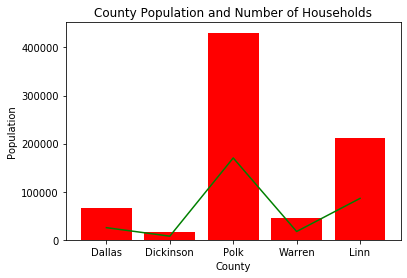

In [8]:
plot_count = []

for v in range(len(county_label)):
    plot_count.append(v)
    
plt.bar(plot_count,county_population,color='red')
plt.plot(plot_count,county_num_households,color='green')
plt.xticks(plot_count,county_label)
plt.title('County Population and Number of Households')
plt.xlabel('County')
plt.ylabel('Population')

## Topic 2: Database Integration

### Integrating with databases allows for extensive new abilities in your program development

### If you are only interested in a subset of data available, keeping all data in a database makes sense

### Databases are a shared format so other applications can access this data as necessary

### Large datasets often need to be stored in a database else they become unwieldy to work with in a program

### Let's create a simple database and load some data into it

### Here I'm just creating an empty database, connecting to it and then dropping the connection

In [9]:
import sqlite3
from sqlite3 import Error

def create_connection(db):
    """ Connect to a SQLite database """
    try:
        conn = sqlite3.connect(db)
        print(sqlite3.version)
    except Error as err:
        print(err)
    finally:
        conn.close()

if __name__ == '__main__':
    create_connection("weatherdata.db")

2.6.0


### Now let's do something with this database

### Remember the weather data from last week?  I'm going to load it into lists so I can get it into my database

In [12]:
import csv
with open('NOAA Des Moines Weather data 11_18 to 10_19.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    # Short way to initialize multiple empty lists
    date,max_temp,min_temp,ave_temp,precip,new_snow = ([] for i in range(6))
    
    for row in csv_reader:
        # skip the first line in the file because it is the header
        if line_count == 0:
            line_count += 1
            continue
        date.append(row[0])
        max_temp.append(row[1])
        min_temp.append(row[2])
        ave_temp.append(row[3])
        precip.append(row[4])
        new_snow.append(row[5])

### I have installed this program on my computer to see a GUI view of my database

https://sqlitebrowser.org/dl/#windows

In [10]:
# Connection from earlier except I don't close the connection this time
def create_connection(db):
    """ Connect to a SQLite database
    :param db: filename of database
    :return connection if no error, otherwise None"""
    try:
        conn = sqlite3.connect(db)
        return conn
    except Error as err:
        print(err)
    return None

def create_table(conn, sql_create_table):
    """ Creates table with a SQL statement
    :param conn: Connection object
    :param sql_create_table: a SQL CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(sql_create_table)
    except Error as e:
        print(e)

def create_tables(database):

    sql_create_weather_table = """ CREATE TABLE IF NOT EXISTS weather (
                                        date text PRIMARY KEY,
                                        county text NOT NULL,
                                        max_temp int NOT NULL,
                                        min_temp int NOT NULL,
                                        ave_temp int NOT NULL,
                                        precip text NOT NULL,
                                        new_snow text NOT NULL
                                    ); """


    # create a database connection
    conn = create_connection(database)
    if conn is not None:
        # create weather table
        create_table(conn, sql_create_weather_table)
        
    else:
        print("Unable to connect to " + str(database))

if __name__ == '__main__':
    create_tables("weatherdata.db")

### I've now got an empty table with columns for each item of my data

### I'm ready to load data into my new table

In [13]:
def add_record(conn, record):
    """Create a new record for table
    :param conn:
    :param record:
    :return: record_id
    """
    sql = ''' INSERT OR IGNORE INTO weather(date,county,max_temp,min_temp,ave_temp,precip,new_snow)
              VALUES(?,?,?,?,?,?,?) '''
    cur = conn.cursor()  # cursor object
    cur.execute(sql, record)
    return cur.lastrowid # returns the row id of the cursor object, the record's primary key

if __name__ == '__main__':
    conn = create_connection("weatherdata.db")
    with conn:
        for n in range(len(date)):
            record = (date[n],"Des Moines",max_temp[n],min_temp[n],ave_temp[n],precip[n],new_snow[n])
            print(record)
            record_id = add_record(conn, record)

('11/1/2018', 'Des Moines', '60', '36', '48', '0', '0')
('11/2/2018', 'Des Moines', '52', '43', '47.5', '0.1', '0')
('11/3/2018', 'Des Moines', '45', '40', '42.5', '0.66', '0')
('11/4/2018', 'Des Moines', '46', '41', '43.5', '0.33', '0')
('11/5/2018', 'Des Moines', '47', '36', '41.5', '0.21', '0')
('11/6/2018', 'Des Moines', '44', '30', '37', 'T', '0')
('11/7/2018', 'Des Moines', '33', '27', '30', '0', '0')
('11/8/2018', 'Des Moines', '34', '30', '32', 'T', '0.1')
('11/9/2018', 'Des Moines', '30', '16', '23', '0.01', '0.3')
('11/10/2018', 'Des Moines', '29', '12', '20.5', '0', '0')
('11/11/2018', 'Des Moines', '45', '24', '34.5', '0', '0')
('11/12/2018', 'Des Moines', '28', '17', '22.5', 'T', 'T')
('11/13/2018', 'Des Moines', '31', '11', '21', '0', '0')
('11/14/2018', 'Des Moines', '42', '19', '30.5', '0', '0')
('11/15/2018', 'Des Moines', '48', '21', '34.5', '0', '0')
('11/16/2018', 'Des Moines', '47', '36', '41.5', '0.01', '0')
('11/17/2018', 'Des Moines', '36', '22', '29', '0.07', '

### Now that I have my data in my database, I can query the database for information

In [14]:
def select_all_weather (conn):
    """Query all rows of weather table
    :param conn: the connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM weather")

    rows = cur.fetchall()

    return rows # return the rows

if __name__ == '__main__':
    conn = create_connection("weatherdata.db")
    with conn:
        rows = select_all_weather(conn)
        for row in rows:
            print(row)

('11/1/2018', 'Des Moines', 60, 36, 48, '0', '0')
('11/2/2018', 'Des Moines', 52, 43, 47.5, '0.1', '0')
('11/3/2018', 'Des Moines', 45, 40, 42.5, '0.66', '0')
('11/4/2018', 'Des Moines', 46, 41, 43.5, '0.33', '0')
('11/5/2018', 'Des Moines', 47, 36, 41.5, '0.21', '0')
('11/6/2018', 'Des Moines', 44, 30, 37, 'T', '0')
('11/7/2018', 'Des Moines', 33, 27, 30, '0', '0')
('11/8/2018', 'Des Moines', 34, 30, 32, 'T', '0.1')
('11/9/2018', 'Des Moines', 30, 16, 23, '0.01', '0.3')
('11/10/2018', 'Des Moines', 29, 12, 20.5, '0', '0')
('11/11/2018', 'Des Moines', 45, 24, 34.5, '0', '0')
('11/12/2018', 'Des Moines', 28, 17, 22.5, 'T', 'T')
('11/13/2018', 'Des Moines', 31, 11, 21, '0', '0')
('11/14/2018', 'Des Moines', 42, 19, 30.5, '0', '0')
('11/15/2018', 'Des Moines', 48, 21, 34.5, '0', '0')
('11/16/2018', 'Des Moines', 47, 36, 41.5, '0.01', '0')
('11/17/2018', 'Des Moines', 36, 22, 29, '0.07', '0.4')
('11/18/2018', 'Des Moines', 30, 11, 20.5, '0', '0')
('11/19/2018', 'Des Moines', 40, 19, 29.5, 

### I can also update data on my database in many different ways

### Let's fix that precip column so it can be used as a number by changing T to 0

In [15]:
def update_precip(conn):
    """Update data of precip to remove 'T'
    :param conn:
    :return: none
    """
    sql = '''UPDATE weather
             SET precip = '0'
             WHERE precip = 'T'
            '''
    cur = conn.cursor()
    cur.execute(sql)

if __name__ == '__main__':
    conn = create_connection("weatherdata.db")
    with conn:
        update_precip(conn)
       
        rows = select_all_weather(conn)
        for row in rows:
            print(row)
    

('11/1/2018', 'Des Moines', 60, 36, 48, '0', '0')
('11/2/2018', 'Des Moines', 52, 43, 47.5, '0.1', '0')
('11/3/2018', 'Des Moines', 45, 40, 42.5, '0.66', '0')
('11/4/2018', 'Des Moines', 46, 41, 43.5, '0.33', '0')
('11/5/2018', 'Des Moines', 47, 36, 41.5, '0.21', '0')
('11/6/2018', 'Des Moines', 44, 30, 37, '0', '0')
('11/7/2018', 'Des Moines', 33, 27, 30, '0', '0')
('11/8/2018', 'Des Moines', 34, 30, 32, '0', '0.1')
('11/9/2018', 'Des Moines', 30, 16, 23, '0.01', '0.3')
('11/10/2018', 'Des Moines', 29, 12, 20.5, '0', '0')
('11/11/2018', 'Des Moines', 45, 24, 34.5, '0', '0')
('11/12/2018', 'Des Moines', 28, 17, 22.5, '0', 'T')
('11/13/2018', 'Des Moines', 31, 11, 21, '0', '0')
('11/14/2018', 'Des Moines', 42, 19, 30.5, '0', '0')
('11/15/2018', 'Des Moines', 48, 21, 34.5, '0', '0')
('11/16/2018', 'Des Moines', 47, 36, 41.5, '0.01', '0')
('11/17/2018', 'Des Moines', 36, 22, 29, '0.07', '0.4')
('11/18/2018', 'Des Moines', 30, 11, 20.5, '0', '0')
('11/19/2018', 'Des Moines', 40, 19, 29.5, 